<a href="https://colab.research.google.com/github/simodepth/AI-Models/blob/main/DALL%C2%B7E_Mini_AI_image_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate AI images with DALL-E Mini


---

Since the eraly stages of June 2022, DALL-E Mini has earned a lot of hype  on the Internet with many people hurrying frightfully to try out the new AI toy.

As the hype mounted, the service occasionally displayed a few bottlenecks resulting in the error:"**Too much traffic, please try again**."

To solve the riddle, one member from the [Wandb](https://wandb.ai/onlineinference/ml-news/reports/Beating-The-DALL-E-Mini-Too-much-traffic-please-try-again---VmlldzoyMTg4Mjkz) team created a super-easy-to-run Colab embossing a Python script which you will find below.



#Requirements and Assumptions

- A **wandb API key** is required to run this colab: [open a free account at wandb](https://wandb.ai/onlineinference/ml-news/reports/Beating-The-DALL-E-Mini-Too-much-traffic-please-try-again---VmlldzoyMTg4Mjkz) to run this framework and keep signed up for the runtime
- Use a GPU runtime to speed up the process

# Credit

This Colab is a lightly modified version of the [DALL·E Mini inference pipeline](https://colab.research.google.com/github/borisdayma/dalle-mini/blob/main/tools/inference/inference_pipeline.ipynb). More information about using DALL·E Mini through code can be found at the [DALL·E Mini GitHub repository](https://github.com/borisdayma/dalle-mini).

# Initialize

Run this code section to initialize everything required to use DALL·E Mini. It may take a minute or so to process. Please wait for it to finish working before continuing.

Note: DALL·E Mini is the default option. If you would like to use DALL·E Mega, check the "USE_MEGA" box. If you choose to use DALL·E Mega and are not using Colab Pro, you will likely run into RAM errors.

In [ ]:
USE_MEGA = False #@param {type:"boolean"}

!pip install -q dalle-mini
!pip install -q git+https://github.com/patil-suraj/vqgan-jax.git

import jax
import jax.numpy as jnp
import numpy as np
import random
from dalle_mini import DalleBart, DalleBartProcessor
from flax.jax_utils import replicate
from flax.training.common_utils import shard_prng_key
from functools import partial
from google.colab import widgets
from PIL import Image
from tqdm.notebook import trange
from vqgan_jax.modeling_flax_vqgan import VQModel

DALLE_MODEL = "dalle-mini/dalle-mini/mini-1:v0" if not USE_MEGA else "dalle-mini/dalle-mini/mega-1-fp16:latest"
DALLE_COMMIT_ID = None
VQGAN_REPO = "dalle-mini/vqgan_imagenet_f16_16384"
VQGAN_COMMIT_ID = "e93a26e7707683d349bf5d5c41c5b0ef69b677a9"

model, params = DalleBart.from_pretrained(DALLE_MODEL, revision=DALLE_COMMIT_ID, dtype=jnp.float16, _do_init=False)
vqgan, vqgan_params = VQModel.from_pretrained(VQGAN_REPO, revision=VQGAN_COMMIT_ID, _do_init=False)
params = replicate(params)
vqgan_params = replicate(vqgan_params)

@partial(jax.pmap, axis_name="batch", static_broadcasted_argnums=(3, 4, 5, 6))
def p_generate(tokenized_prompt, key, params, top_k, top_p, temperature, condition_scale):
  return model.generate(**tokenized_prompt, prng_key=key, params=params, top_k=top_k, top_p=top_p, temperature=temperature, condition_scale=condition_scale)
@partial(jax.pmap, axis_name="batch")
def p_decode(indices, params):
  return vqgan.decode_code(indices, params=params)

seed = random.randint(0, 2**32 - 1)
key = jax.random.PRNGKey(seed)
processor = DalleBartProcessor.from_pretrained(DALLE_MODEL, revision=DALLE_COMMIT_ID)

n_predictions = 9
gen_top_k = None
gen_top_p = None
temperature = None
cond_scale = 10.0

     |████████████████████████████████| 175 kB 14.3 MB/s 
     |████████████████████████████████| 1.8 MB 59.1 MB/s 
     |████████████████████████████████| 4.4 MB 46.6 MB/s 
     |████████████████████████████████| 197 kB 64.4 MB/s 
     |████████████████████████████████| 235 kB 74.4 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 140 kB 76.6 MB/s 
     |████████████████████████████████| 216 kB 79.0 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 
     |████████████████████████████████| 72 kB 508 kB/s 
     |████████████████████████████████| 596 kB 63.9 MB/s 
     |████████████████████████████████| 86 kB 5.8 MB/s 
     |████████████████████████████████| 6.6 MB 45.1 MB/s 
     |████████████████████████████████| 181 kB 71.2 MB/s 
     |████████████████████████████████| 145 kB 72.5 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Downloading large artifact mini-1:v0, 1673.43MB. 7 files... Done. 0:0:14.2


Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/290M [00:00<?, ?B/s]

wandb: Downloading large artifact mini-1:v0, 1673.43MB. 7 files... Done. 0:0:11.0


Downloading:   0%|          | 0.00/34.2M [00:00<?, ?B/s]

# Generate Images

This is where you can generate images with DALL·E Mini. Enter your prompt into the "prompt" field to the right, and run the code block. A grid of 9 images will be produced. The first run may take slightly longer than subsequent runs as the hardware warms up.

You can change the prompt and re-run the code as many times as you like without re-running the initialization code above.

  0%|          | 0/9 [00:00<?, ?it/s]

Queen Elizabeth doing the washing up


,,
,,
,,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

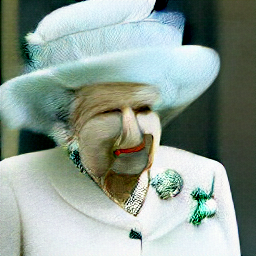

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

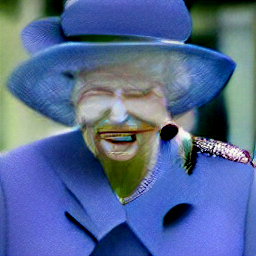

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

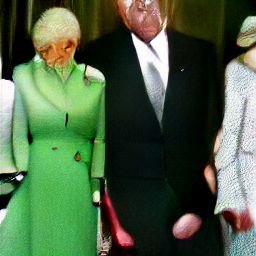

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

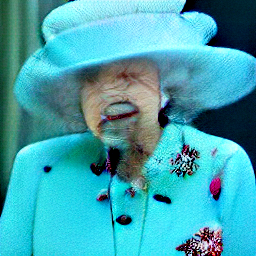

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

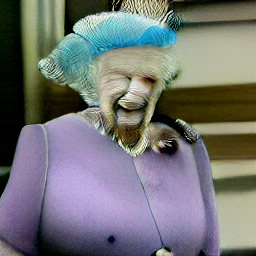

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

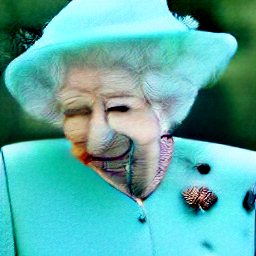

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

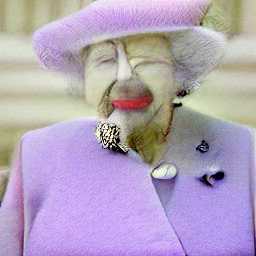

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

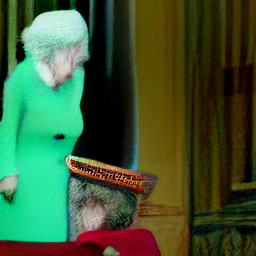

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

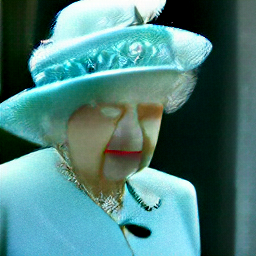

<IPython.core.display.Javascript object>

In [ ]:
try:
  prompt = "Queen Elizabeth doing the washing up" #@param {type:"string"}
  prompts = [prompt]
  tokenized_prompts = processor(prompts)
  tokenized_prompt = replicate(tokenized_prompts)
  images = []
  for i in trange(max(n_predictions // jax.device_count(), 1)):
    key, subkey = jax.random.split(key)
    encoded_images = p_generate(tokenized_prompt, shard_prng_key(subkey), params, gen_top_k, gen_top_p, temperature, cond_scale)
    encoded_images = encoded_images.sequences[..., 1:]
    decoded_images = p_decode(encoded_images, vqgan_params)
    decoded_images = decoded_images.clip(0.0, 1.0).reshape((-1, 256, 256, 3))
    for decoded_img in decoded_images:
      img = Image.fromarray(np.asarray(decoded_img * 255, dtype=np.uint8))
      images.append(img)
  print(prompt)
  grid = widgets.Grid(3, 3)
  for i in range(3):
    for j in range(3):
      with grid.output_to(i, j):
        display(images[i*3+j])
except NameError:
  print("Please run the initialization code block first.")